# **Trabalho Prático: Previsão de Incidentes Rodoviários**

## Descrição do Problema

## Preparação do programa

### Bibliotecas e Funções

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn                import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Modelos a usar
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import RandomForestClassifier
from sklearn.svm          import SVC


#Métricas de qualidade
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer


#Neural networks
import tensorflow as tf
from sklearn.preprocessing                  import MinMaxScaler
from tensorflow.keras.models                import Sequential
from tensorflow.keras.layers                import Dense, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from livelossplot                           import PlotLossesKerasTF

### Leitura dos datasets

In [2]:
dftrain = pd.read_csv('training_data.csv')
dftest = pd.read_csv('test_data.csv')

## Exploração dos dados

Para esta etapa do trabalho, também se utilizou as informações obtidas no website "kaggle", tais como:
* Tipos dos atributos
* Conteúdo dos atributos
* Missing values

### Visualização dos dados

In [3]:
dftrain.shape

(5000, 13)

In [4]:
dftrain.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [5]:
dftrain.tail()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
4995,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,0.0,Sem Chuva,High
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,0.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None
4999,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-12-20 02:00,DARK,12.0,1018.0,77.0,3.0,0.0,Sem Chuva,None


### Informações sobre os diferentes atributos

In [6]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [7]:
dftrain.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


### Missing Values

In [8]:
dftrain.isna().any()

city_name             False
magnitude_of_delay    False
delay_in_seconds      False
affected_roads         True
record_date           False
luminosity            False
avg_temperature       False
avg_atm_pressure      False
avg_humidity          False
avg_wind_speed        False
avg_precipitation     False
avg_rain              False
incidents             False
dtype: bool

In [9]:
dftrain.isna().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

### Matriz de Correlação

<AxesSubplot:>

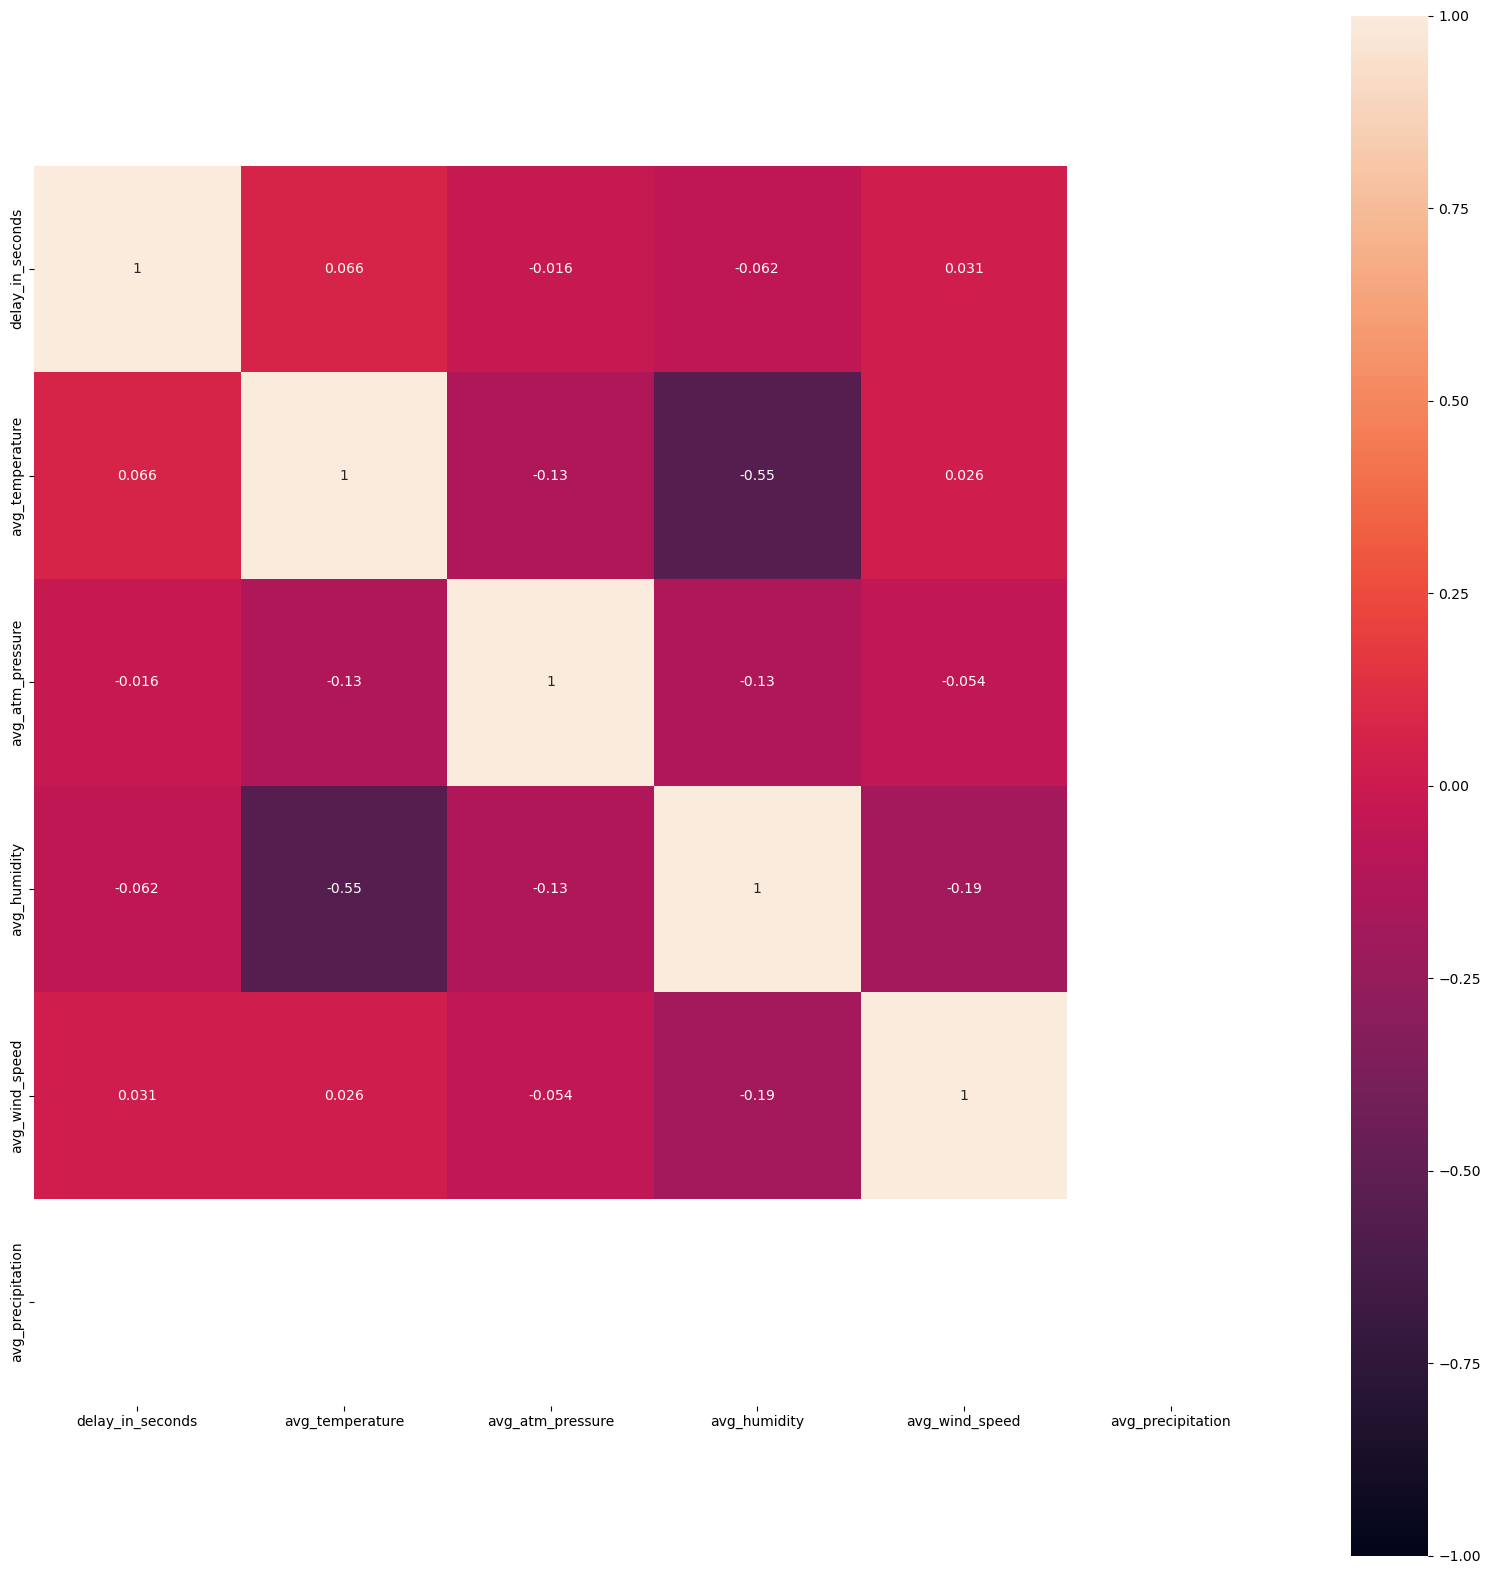

In [10]:
corr_matrix = dftrain.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Pairplot

### Histogramas

## Preparação dos dados

### Apagar atributos

In [11]:
# Era sempre Guimarães em todos os registos, logo não tem impacto nenhum
dftrain = dftrain.drop(["city_name"], axis=1)
dftest = dftest.drop(["city_name"], axis=1)

# Era sempre 0 em todos os registos, logo não tem impacto nenhum
dftrain = dftrain.drop(["avg_precipitation"], axis=1)
dftest = dftest.drop(["avg_precipitation"], axis=1)

# Era sempre 0 em todos os registos, logo não tem impacto nenhum
#dftrain = dftrain.drop(["delay_in_seconds"], axis=1)
#dftest = dftest.drop(["delay_in_seconds"], axis=1)

### Alteração do tipo dos atributos

#### Label Encoding

In [12]:
label_encoder = preprocessing.LabelEncoder()

#Train
dftrain['magnitude_of_delay']= label_encoder.fit_transform(dftrain['magnitude_of_delay'])
dftrain['luminosity']= label_encoder.fit_transform(dftrain['luminosity'])
dftrain['avg_rain']= label_encoder.fit_transform(dftrain['avg_rain'])
#dftrain['incidents']= label_encoder.fit_transform(dftrain['incidents'])

#Test
dftest['magnitude_of_delay']= label_encoder.fit_transform(dftest['magnitude_of_delay'])
dftest['luminosity']        = label_encoder.fit_transform(dftest['luminosity'])
dftest['avg_rain']          = label_encoder.fit_transform(dftest['avg_rain'])

#### Atributo affected_roads

##### Quantidade de vezes que estradas aparecem

In [13]:
dftrain['affected_roads']  = dftrain['affected_roads'].apply(lambda x: 0 if pd.isnull(x) else len(list(filter(None, x.split(',')))))
dftest['affected_roads']   = dftest['affected_roads'].apply(lambda x: 0 if pd.isnull(x) else len(list(filter(None, x.split(',')))))


##### Quantidade de vezes que cada tipo de estrada aparece

#### String to Date

In [14]:
# TRAIN
dftrain['record_date'] = pd.to_datetime(dftrain['record_date'], format='%Y-%m-%d %H:%M')

# Este dataset é apenas num ano, logo será igual para todos os registos
dftrain['record_month'] = dftrain['record_date'].dt.month
dftrain['record_day'] = dftrain['record_date'].dt.day
dftrain['record_hour'] = dftrain['record_date'].dt.hour

# Já não precisamos do record_date para nada
dftrain = dftrain.drop(["record_date"], axis=1)

# TEST
dftest['record_date'] = pd.to_datetime(dftest['record_date'], format='%Y-%m-%d %H:%M')

# Este dataset é apenas num ano, logo será igual para todos os registos
dftest['record_month'] = dftest['record_date'].dt.month
dftest['record_day'] = dftest['record_date'].dt.day
dftest['record_hour'] = dftest['record_date'].dt.hour

# Já não precisamos do record_date para nada
dftest = dftest.drop(["record_date"], axis=1)

#### Tipo do atributo dependente

In [15]:
def incidentsToInt(x):
    return {
        'None'      : 0,
        'Low'       : 1, 
        'Medium'    : 2, 
        'High'      : 3, 
        'Very_High' : 4
    }[x]

def intToIncidents(x):
    return {
        0 : 'None',
        1 : 'Low',
        2 : 'Medium',
        3 : 'High',
        4 : 'Very_High'
    }[x]

In [16]:
dftrain['incidents'] = dftrain['incidents'].apply(lambda x:incidentsToInt(x))

## Modelos

### Preparação prévia

#### Separação da variável dependente

In [17]:
X_train = dftrain.drop(['incidents'], axis=1)
Y_train = dftrain[['incidents']]

#### Separação entre dataframe de teste e de treino

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

### Treino dos modelos

#### Regressão Logística

In [127]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'max_iter': [10000, 100000, 1000000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.001, 0.01, 0.1]}

In [128]:
reg = LogisticRegression()
print(reg.get_params().keys())
grid = GridSearchCV(reg, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, Y_train.values.ravel())
predictions = reg.predict(X_test)

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


KeyboardInterrupt: 

##### Modelo final

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'max_iter': [10000, 100000, 1000000]}

logreg=LogisticRegression()
grid = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 3, verbose = 1)
grid.fit(X_train, Y_train)
print(grid.best_params_)
print(grid.best_score_)



Fitting 3 folds for each of 15 candidates, totalling 45 fits


c:\Users\vasco\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

#### Decision Tree

##### Descoberta dos melhores parâmetros

##### Modelo final

In [19]:
model = DecisionTreeClassifier(random_state=2022, 
                               criterion = 'entropy',
                               max_depth = 16, 
                               ccp_alpha = 0.0007292929292929296)
model.fit(X_train, Y_train)
print("depth: ", model.get_depth())
print("leafs: ", model.get_n_leaves())

depth:  16
leafs:  240


##### Descoberta dos melhores parâmetros

##### Modelo final

#### SVM

##### Descoberta dos melhores parâmetros

In [ ]:
param_grid = {'C': [1800], 'gamma' : [0.001], 'tol' : [0.0000001], 'kernel' : ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train, Y_train.values.ravel())
print(grid.best_params_)
print(grid.best_estimator_)

##### Modelo Final

In [20]:
model = SVC(C = 1800, gamma = 0.001, tol = 0.0000001, kernel = 'rbf')
model.fit(X_train, Y_train.values.ravel())

SVC(C=1800, gamma=0.001, tol=1e-07)

#### MLP

##### Descoberta dos parametros

###### Scaling

In [ ]:
scaler_X = MinMaxScaler(feature_range=(0 , 1)).fit(X_train)
scaler_Y = MinMaxScaler(feature_range=(0 , 1)).fit(Y_train)

X_scaled = pd.DataFrame(scaler_X.transform(X_train[X_train.columns]), columns=X_train.columns)
Y_scaled = pd.DataFrame(scaler_Y.transform(Y_train[Y_train.columns]), columns=Y_train.columns)

X_test_scaled = pd.DataFrame(scaler_X.transform(X_test[X_test.columns]), columns=X_test.columns)
Y_test_scaled = pd.DataFrame(scaler_Y.transform(Y_test[Y_test.columns]), columns=Y_test.columns)

###### Construção de uma rede neuronal

In [ ]:
def build_model(activation='relu', learning_rate=0.01):
	model = Sequential()
	model.add(Dense(12, input_dim=12, activation=activation))
	model.add(Dense(8, activation=activation))
	model.add(Dense(4, activation=activation))
	model.add(Dense(1, activation='relu'))

	model.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate), metrics=['mae','mse'])

	return model

model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


###### Gridsearch

In [ ]:
TUNING_DICT = {
	'activation':		['relu', 'sigmoid', 'tanh', 'linear'],
	'learning_rate':	[0.001, 0.0001]
}

kf = KFold(n_splits=5, shuffle=True, random_state=2022)

grid_model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)
grid_search = GridSearchCV(estimator=grid_model, param_grid=TUNING_DICT, cv=kf, scoring='neg_mean_absolute_error', refit='True')
grid_search.fit(X_scaled, Y_scaled, validation_split=0.2)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

    

C:\Users\vasco\AppData\Local\Temp\ipykernel_17836\3475281941.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)


Epoch 1/20
100/100 [==============================] - 2s 13ms/step - loss: 0.3307 - mae: 0.3307 - mse: 0.1587 - val_loss: 0.3095 - val_mae: 0.3095 - val_mse: 0.1367
Epoch 2/20
100/100 [==============================] - 1s 7ms/step - loss: 0.2833 - mae: 0.2833 - mse: 0.1088 - val_loss: 0.2654 - val_mae: 0.2654 - val_mse: 0.0977
Epoch 3/20
100/100 [==============================] - 1s 6ms/step - loss: 0.2402 - mae: 0.2402 - mse: 0.0880 - val_loss: 0.2346 - val_mae: 0.2346 - val_mse: 0.0915
Epoch 4/20
100/100 [==============================] - 1s 5ms/step - loss: 0.2162 - mae: 0.2162 - mse: 0.0787 - val_loss: 0.2165 - val_mae: 0.2165 - val_mse: 0.0764
Epoch 5/20
100/100 [==============================] - 1s 6ms/step - loss: 0.1993 - mae: 0.1993 - mse: 0.0686 - val_loss: 0.1987 - val_mae: 0.1987 - val_mse: 0.0681
Epoch 6/20
100/100 [==============================] - 1s 8ms/step - loss: 0.1829 - mae: 0.1829 - mse: 0.0612 - val_loss: 0.1859 - val_mae: 0.1859 - val_mse: 0.0585
Epoch 7/20
100/

###### Modelo Final

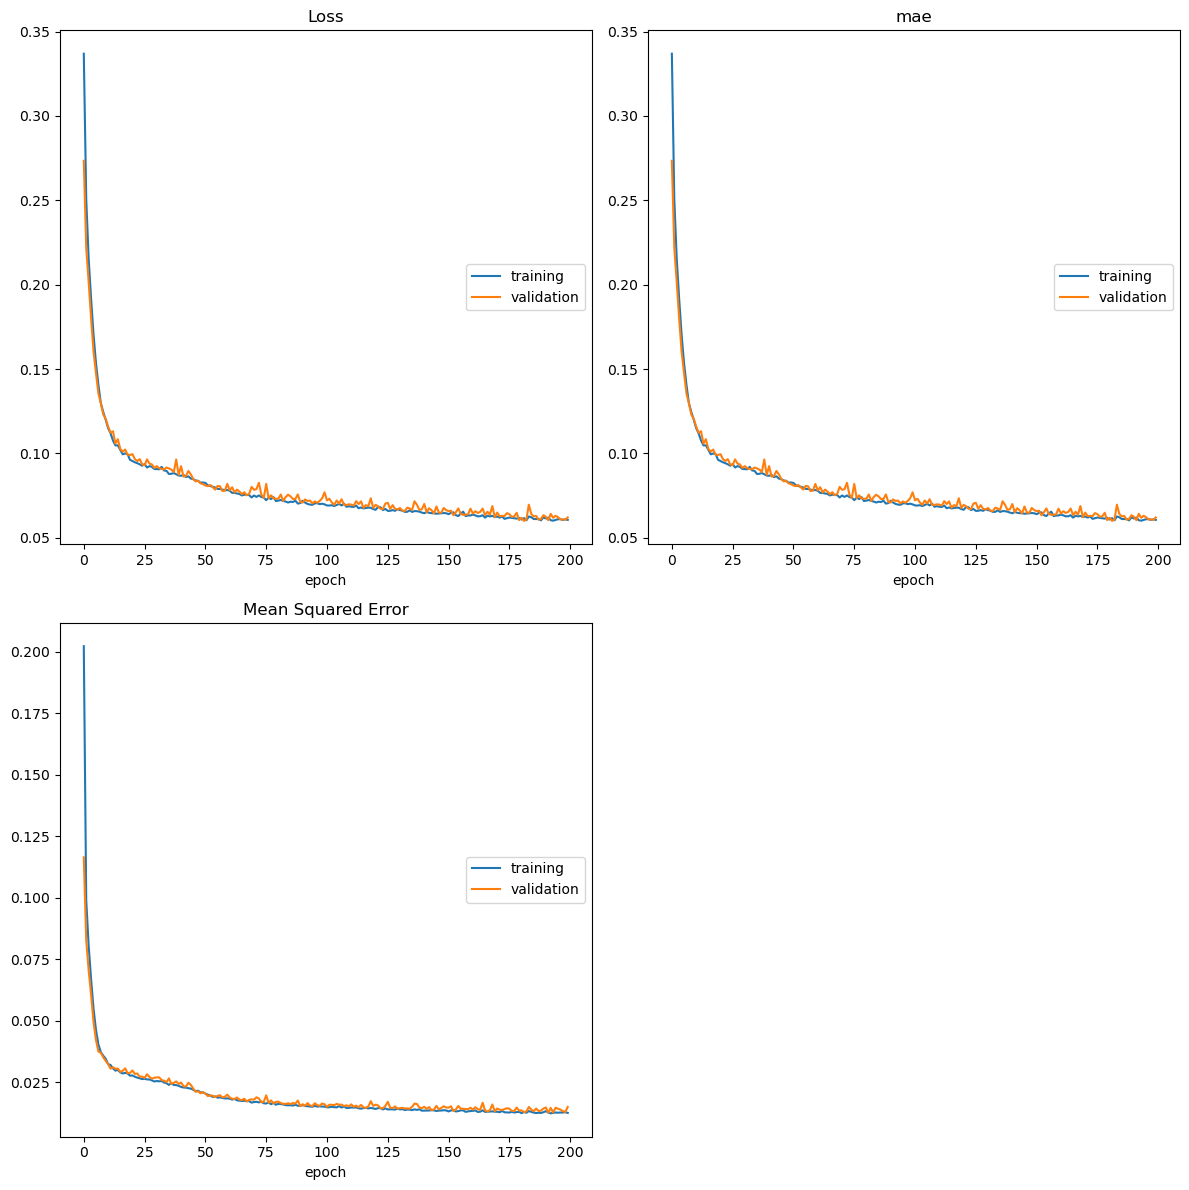

Loss
	training         	 (min:    0.060, max:    0.337, cur:    0.061)
	validation       	 (min:    0.060, max:    0.273, cur:    0.062)
mae
	training         	 (min:    0.060, max:    0.337, cur:    0.061)
	validation       	 (min:    0.060, max:    0.273, cur:    0.062)
Mean Squared Error
	training         	 (min:    0.012, max:    0.202, cur:    0.013)
	validation       	 (min:    0.013, max:    0.116, cur:    0.015)
157/157 [==============================] - 4s 23ms/step - loss: 0.0606 - mae: 0.0606 - mse: 0.0127 - val_loss: 0.0621 - val_mae: 0.0621 - val_mse: 0.0151


In [ ]:
model = grid_search.best_estimator_
model.fit(X_scaled, Y_scaled, epochs=200, validation_data=(X_test_scaled, Y_test_scaled), callbacks=[PlotLossesKerasTF()], verbose=1)

###### Predictions

In [ ]:
predictions_scaled = model.predict(X_test_scaled)
predictions_scaled = predictions_scaled.reshape(predictions_scaled.shape[0], 1)
predictions_scaled[:5] # Lista de incidentes previstos. devem estar de 0 a 4

40/40 [==============================] - 0s 5ms/step


array([[0.74151915],
       [0.36276007],
       [0.99194175],
       [0.4981863 ],
       [0.        ]], dtype=float32)

In [ ]:
predictions = scaler_Y.inverse_transform(predictions_scaled)
print(predictions[:5]) 
predictions = predictions.round().astype(int)
print(predictions[:5]) # Lista de incidentes de teste. devem estar de 0 a 4

[[2.9660766]
 [1.4510403]
 [3.967767 ]
 [1.9927452]
 [0.       ]]
[[3]
 [1]
 [4]
 [2]
 [0]]


### Random Forest

In [26]:
# Number of trees in random forest
n_estimators = [500]

# Number of features to consider at every split
max_features = ['log2']

#Maximum number of levels in tree
max_depth = [10]

# Minimum number of samples required to split a node
min_samples_split = [10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10]

# Method of selecting samples for training each tree
bootstrap = [False]


In [27]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap
             }

print(param_grid)


{'n_estimators': [500], 'max_features': ['log2'], 'max_depth': [10], 'min_samples_split': [10], 'min_samples_leaf': [10], 'bootstrap': [False]}


In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
print(model.get_params().keys())
model = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 5, verbose=1, n_jobs = -1, n_iter = 200, scoring = 'accuracy')
model.fit(X_train, Y_train.values.ravel())
predictions = model.predict(X_test)

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\vasco\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=200. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [34]:
print(model.best_params_)

{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
params = {'var_smoothing': np.logspace(0,-9, num=100), 'priors': [None]}
gnb = GaussianNB()
grid = GridSearchCV(gnb, params, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
predictions = grid.predict(X_test)

### Boosting


In [11]:
# Param grid for XGBoost
param_grid = {'n_estimators': [1000], 'max_depth': [30], 'learning_rate': [0.7], 'subsample': [0.9], 'n_thread': [12]}

In [12]:
from xgboost import XGBClassifier
import xgboost as xgb

model = XGBClassifier(use_label_encoder=False)
model = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1);
model.fit(X_train, Y_train.values.ravel())

c:\Users\vasco\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\vasco\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:17:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "n_thread" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:17:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [13]:
model.best_params_

{'learning_rate': 0.7,
 'max_depth': 30,
 'n_estimators': 1000,
 'n_thread': 12,
 'subsample': 0.9}

#### Random Forest

## Métricas de Qualidade

In [21]:
predictions = model.predict(X_test)

#### Accuracy

In [22]:
print(" Accuracy: " + str( accuracy_score(Y_test, predictions)))

 Accuracy: 0.8264


#### Médias de métricas por peso

* __micro__: Calculate metrics globally by counting the total true positives, false negatives and false positives. 
* __macro__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
* __weighted__: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [23]:
print("Precision: " + str(precision_score(Y_test, predictions, average= 'weighted')))
print("   Recall: " + str(recall_score(Y_test, predictions, average= 'weighted')))
print(" F1-Score: " + str(f1_score(Y_test, predictions, average= 'weighted')))

Precision: 0.8279857239207031
   Recall: 0.8264
 F1-Score: 0.8266647126692193


#### Cross Validation

Cross validation irá fazer vários segmentos e testá-los. Se houver um desvio padrão mt grande entre eles, isso quer dizer que existe over-fitting

In [24]:
scores = cross_val_score(model, X_train, Y_train, cv=10, verbose=1, scoring='accuracy')
print(scores)
print("Média: " + str(scores.mean()))
print("desvio padrão: " + str(scores.std()))

C:\Users\duart\anaconda3\envs\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\duart\anaconda3\envs\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\duart\anaconda3\envs\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\duart\anaconda3\envs\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

[0.80266667 0.84266667 0.82933333 0.79733333 0.832      0.79466667
 0.86133333 0.84       0.81333333 0.84266667]
Média: 0.8256
desvio padrão: 0.021339998958658724


#### Erros

In [25]:
print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, predictions)))

MAE: 0.2608
MSE: 0.4736
RMSE: 0.6881860213634101


#### Confusion Matrix

In [26]:
confusion_matrix(Y_test, predictions)

array([[501,  10,   4,   2,   0],
       [ 10, 140,  12,  15,  12],
       [  6,  23, 100,  11,   4],
       [  2,  24,  14, 195,  30],
       [  0,   8,   8,  22,  97]], dtype=int64)

#### Previsões vs Reais

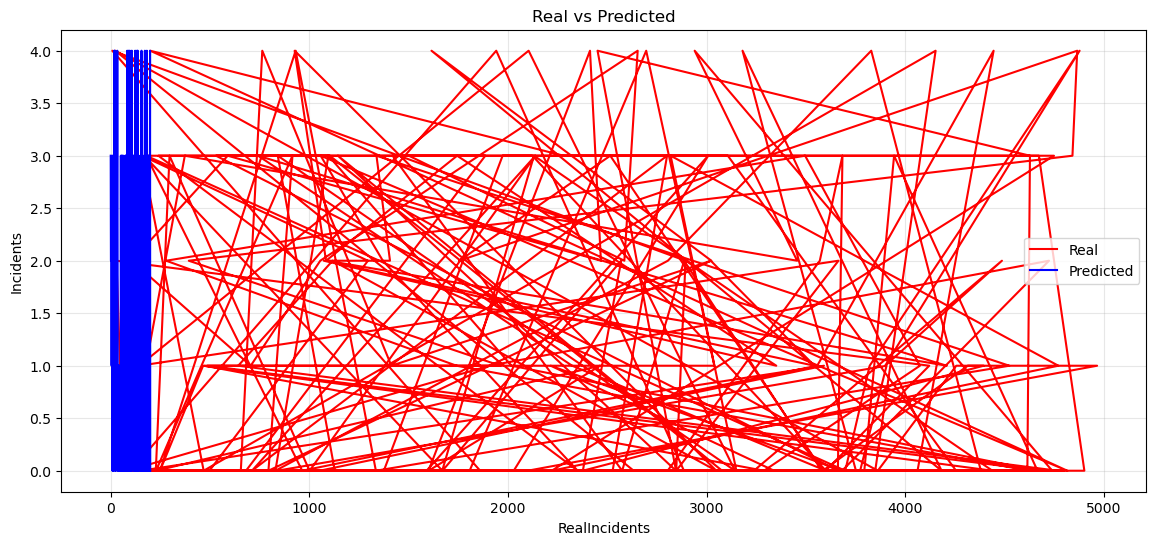

In [27]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14, 6))
    plt.plot(Y_test[:limit], label='Real', color='red')
    plt.plot(predictions[:limit], label='Predicted', color='blue')
    plt.grid(alpha=0.3)
    plt.xlabel('RealIncidents')
    plt.ylabel('Incidents')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()
    
real_predicted_viz(200)

#### Classification Report

In [28]:
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97       517\n           1       0.68      0.74      0.71       189\n           2       0.72      0.69      0.71       144\n           3       0.80      0.74      0.76       265\n           4       0.68      0.72      0.70       135\n\n    accuracy                           0.83      1250\n   macro avg       0.77      0.77      0.77      1250\nweighted avg       0.83      0.83      0.83      1250\n'

## Escrita no Ficheiro

Para fazer uma submissão é preciso meter o seguinte código em modo codigo e nao raw. Tambem é preciso ir a secção Separação entre dataframe de teste e de treino e fazer toggle do que é código e o que é raw

In [29]:
actual_predictions = model.predict(dftest) # Predictions on the test set
actual_predictions = pd.DataFrame(actual_predictions, columns=['incidents']) # Convert to dataframe 
actual_predictions['incidents'] = actual_predictions['incidents'].apply(lambda x: intToIncidents(x))
actual_predictions.head(10)

,incidents
0,Very_High
1,None
2,None
3,Low
4,None
5,Very_High
6,Very_High
7,None
8,High
9,Medium


In [37]:
actual_predictions.reset_index(inplace=True)
actual_predictions['index'] = actual_predictions['index'].transform(lambda x: int(x)+1)
print(actual_predictions.head(10))
actual_predictions.to_csv('submission.csv', sep=',', header=['RowId','Incidents'], index=False, mode='w')

   index  incidents
0      1  Very_High
1      2       None
2      3       None
3      4        Low
4      5       None
5      6  Very_High
6      7  Very_High
7      8       None
8      9       High
9     10     Medium
